In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [33]:
df=pd.read_csv('speed.csv')
df.drop("s.no",axis=1,inplace=True)
df

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16
5,9,10
6,10,18
7,10,26
8,10,34
9,11,17


In [34]:
x=df[['speed']]
y=df['dist']

In [35]:
poly_feature=PolynomialFeatures(degree=2)
x_feature=poly_feature.fit_transform(x)
x_feature

array([[  1.,   4.,  16.],
       [  1.,   4.,  16.],
       [  1.,   7.,  49.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.],
       [  1.,  10., 100.],
       [  1.,  10., 100.],
       [  1.,  11., 121.],
       [  1.,  11., 121.],
       [  1.,  12., 144.],
       [  1.,  12., 144.],
       [  1.,  12., 144.],
       [  1.,  12., 144.],
       [  1.,  13., 169.],
       [  1.,  13., 169.],
       [  1.,  13., 169.],
       [  1.,  13., 169.],
       [  1.,  14., 196.],
       [  1.,  14., 196.],
       [  1.,  14., 196.],
       [  1.,  14., 196.],
       [  1.,  15., 225.],
       [  1.,  15., 225.],
       [  1.,  15., 225.],
       [  1.,  16., 256.],
       [  1.,  16., 256.],
       [  1.,  17., 289.],
       [  1.,  17., 289.],
       [  1.,  17., 289.],
       [  1.,  18., 324.],
       [  1.,  18., 324.],
       [  1.,  18., 324.],
       [  1.,  18., 324.],
       [  1.,  19., 361.],
       [  1.,  19., 361.],
 

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x_feature,y,test_size=0.2,random_state=42)

In [37]:
model=LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [38]:
y_pred=model.predict(x_test)
y_pred

array([28.65932536, 59.50272054, 46.94675497, 78.09143375, 32.05289332,
       78.09143375, 43.02535108, 39.23590618, 51.00011785, 35.57842026])

In [39]:
msc=mean_squared_error(y_pred,y_test)
print(f"mean_squared_error:{msc}")
rmsc=np.sqrt(msc)
print(f"root_mean_squared_error:{rmsc}")
score=r2_score(y_pred,y_test)
print(f"score:{score}")

mean_squared_error:244.52164369387282
root_mean_squared_error:15.637187844809974
score:0.1337588599310412


In [40]:
m=model.predict(poly_feature.transform(x))

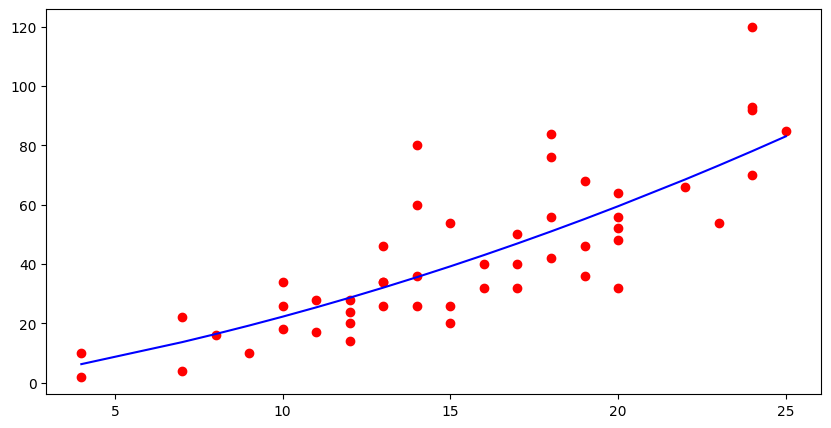

In [41]:
plt.figure(figsize=(10,5))
plt.scatter(x,y,c="r")
plt.plot(x,m,c="b")
plt.show()

In [42]:
new_data=np.array([[12]])
poly=poly_feature.transform(new_data)
predict=model.predict(poly)
predict

c:\Users\ANJAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([28.65932536])

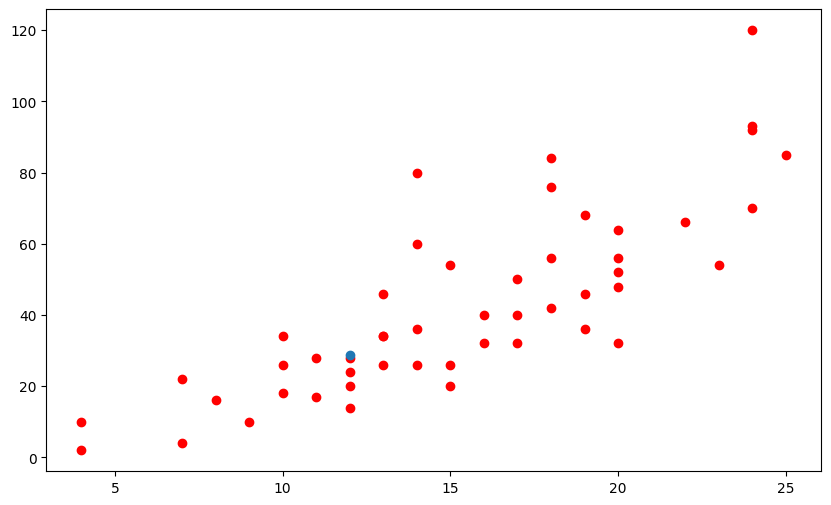

In [43]:
plt.figure(figsize=[10,6])
plt.scatter(x,y,color="red")
plt.scatter(new_data,predict)
plt.show()